<a href="https://colab.research.google.com/github/YingshuangYang/bike-sharing-demand/blob/main/bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Example of supress warnings for Numpy version out of range
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Some required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import plot_tree
from sklearn.metrics import make_scorer
from re import X
from sklearn.metrics import make_scorer

In [ ]:
# Load csv data
train_file = '/content/drive/MyDrive/project 570/train.csv'
test_file = '/content/drive/MyDrive/project 570/test.csv'
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [ ]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Data Fields<br>
datetime - hourly date + timestamp<br>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
holiday - whether the day is considered a holiday<br>
workingday - whether the day is neither a weekend nor holiday<br>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
temp - temperature in Celsius<br>
atemp - "feels like" temperature in Celsius<br>
humidity - relative humidity<br>
windspeed - wind speed<br>
casual - number of non-registered user rentals initiated<br>
registered - number of registered user rentals initiated<br>
count - number of total rentals

In [ ]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# # Some EDA
# # target boxplot
# sns.set_style("whitegrid")
# sns.boxplot(train_data['count'], color='lightblue')
# plt.title('Boxplot of Target Variable')
# plt.tight_layout()
# plt.show()

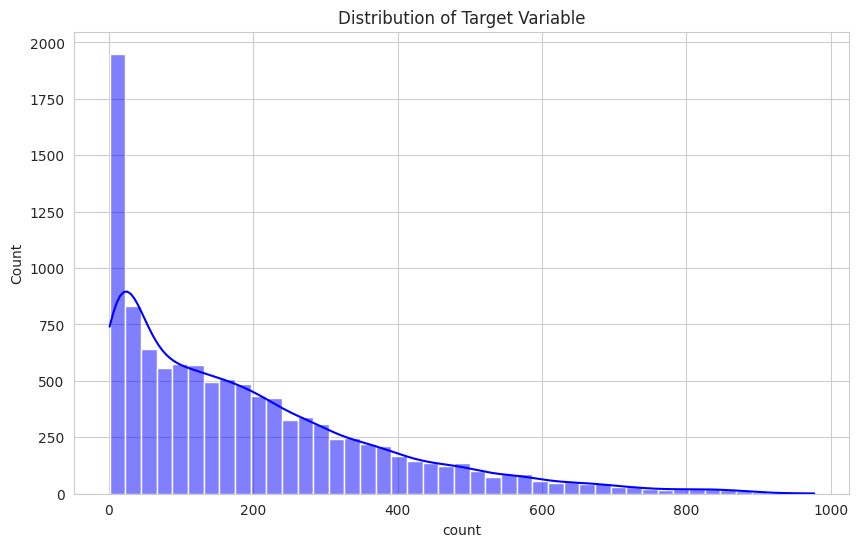

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(train_data['count'], color='blue', kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
# # Creat heatmap
# # Creat correlate matrix
# corr_matrix = train_data.select_dtypes(exclude=object).corr()
# # Create heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')
# plt.tight_layout()
# plt.show()

In [ ]:
# # use boxplot detect outlier
# sns.set_style("whitegrid")
# fig, axes = plt.subplots(3, 3, figsize=(15, 20))
# cols = train_data.iloc[:,:-3]
# for i, col in enumerate(cols):
#     plt.figure(figsize=(5, 3))
#     row = i // 3
#     col_index = i % 3
#     sns.boxplot(data= train_data, x=col, ax=axes[row, col_index], color='lightblue')
#     axes[row, col_index].set_title(f'Boxplot of {col} Variable')
# plt.tight_layout()
# plt.show()

In [ ]:
# # the relation between humidity and count
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='humidity', y='count', data=train_data, color='blue')
# plt.title('Relationship between Humidity and Count', fontsize=14, weight='bold')

In [ ]:
# Data preprocessing
# remove outlier in humidity and windspeed
train_data = train_data[train_data['humidity'] > 20]
q1 = train_data['windspeed'].quantile(0.25)
q3 = train_data['windspeed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
train_data = train_data[(train_data['windspeed'] >= lower_bound) & (train_data['windspeed'] <= upper_bound)]

In [ ]:
train_data.info()
# Create hour of the day
train_data['hour'] = pd.to_datetime(train_data['datetime']).dt.hour+1
# Create day of the work
train_data['day_of_week'] = pd.to_datetime(train_data['datetime']).dt.dayofweek+1
# Create month
train_data['month'] = pd.to_datetime(train_data['datetime']).dt.month
# Create week
train_data['week'] = pd.to_datetime(train_data['datetime']).dt.strftime("%U").astype(int)+1

<class 'pandas.core.frame.DataFrame'>
Index: 10596 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10596 non-null  object 
 1   season      10596 non-null  int64  
 2   holiday     10596 non-null  int64  
 3   workingday  10596 non-null  int64  
 4   weather     10596 non-null  int64  
 5   temp        10596 non-null  float64
 6   atemp       10596 non-null  float64
 7   humidity    10596 non-null  int64  
 8   windspeed   10596 non-null  float64
 9   casual      10596 non-null  int64  
 10  registered  10596 non-null  int64  
 11  count       10596 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [ ]:
train_data['temp_category'] = pd.cut(train_data['temp'],
                             bins=[-float('inf'), 10, 30, float('inf')],
                             labels=['1', '2', '3']).astype(int)

In [ ]:
train_data.drop(['casual', 'registered','datetime'], axis=1, inplace=True)

In [ ]:
train_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day_of_week,month,week,temp_category
0,1,0,0,1,9.84,14.395,81,0.0000,16,1,6,1,1,1
1,1,0,0,1,9.02,13.635,80,0.0000,40,2,6,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,3,6,1,1,1
3,1,0,0,1,9.84,14.395,75,0.0000,13,4,6,1,1,1
4,1,0,0,1,9.84,14.395,75,0.0000,1,5,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,20,3,12,52,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,21,3,12,52,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,22,3,12,52,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,23,3,12,52,2


In [ ]:
X_train = train_data.drop('count', axis=1)
y_train = train_data['count']
print(X_train.shape)
print(y_train.shape)

(10596, 13)
(10596,)


In [ ]:
# # Standardize
# features_to_scale = ['atemp', 'humidity', 'windspeed']
# scaler = StandardScaler()
# X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
# X_train.describe()

In [ ]:
# # Limit too large data
# large_num_column = ['atemp', 'humidity', 'windspeed']
# X_train[large_num_column] = np.clip(X_train[large_num_column], -1e308, 1e308)
# X_train.describe()

In [ ]:
# split data into train and test
# X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
# evaluation method
def rmsle(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)

    squared_log_error = np.square(log_true - log_pred)

    mean_squared_log_error = np.mean(squared_log_error)
    rmsle_value = np.sqrt(mean_squared_log_error)

    return rmsle_value

In [ ]:
#RMSLE 函数转化为 scikit-learn 支持的评分器
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
# 用default值创建随机森林
# rf_1 = RandomForestRegressor(random_state=0)
# rf_1.fit(X_train_split, y_train_split)
# y_train_pred_rf_1 = rf_1.predict(X_train_split)
# y_test_pred_rf_1 = rf_1.predict(X_test_split)
# train_rmsle_value_rf_1 = rmsle(y_train_split, y_train_pred_rf_1)
# test_rmsle_value_rf_1 = rmsle(y_test_split, y_test_pred_rf_1)
# print(f"The first Random Forest Train RMSLE: {train_rmsle_value_rf_1}")
# print(f"The first Random Forest Test RMSLE: {test_rmsle_value_rf_1}")

In [ ]:
# # 创建svr
# svr = SVR()
# #对y进行log转换
# y_train_log = np.log1p(y_train_split)
# y_train_pred_svr = svr.fit(X_train_split, y_train_log).predict(X_train_split)
# y_test_pred_svr = svr.predict(X_test_split)
# #对y还原
# y_train_pred_svr = np.expm1(y_train_pred_svr)
# y_test_pred_svr = np.expm1(y_test_pred_svr)
# train_rmsle_value_svr = rmsle(y_train_split, y_train_pred_svr)
# test_rmsle_value_svr = rmsle(y_test_split, y_test_pred_svr)
# print(f"SVR Train RMSLE: {train_rmsle_value_svr}")
# print(f"SVR Test RMSLE: {test_rmsle_value_svr}")

In [ ]:
# # 创建 ridge regression
# ridge = Ridge()
# y_train_pred_ridge = ridge.fit(X_train_split, y_train_log).predict(X_train_split)
# y_test_pred_ridge = ridge.predict(X_test_split)
# #对y还原
# y_train_pred_ridge = np.expm1(y_train_pred_ridge)
# y_test_pred_ridge = np.expm1(y_test_pred_ridge)
# train_rmsle_value_ridge = rmsle(y_train_split, y_train_pred_ridge)
# test_rmsle_value_ridge = rmsle(y_test_split, y_test_pred_ridge)
# print(f"Ridge Regression Train RMSLE: {train_rmsle_value_ridge}")
# print(f"Ridge Regression Test RMSLE: {test_rmsle_value_ridge}")

In [ ]:
# 对模型之间的结果visulize
# models = ['Random Forest', 'SVR', 'Ridge Regression']
# rmsle_test_values = [test_rmsle_value_rf_1, test_rmsle_value_svr, test_rmsle_value_ridge]
# rmsle_train_values = [train_rmsle_value_rf_1, train_rmsle_value_svr, train_rmsle_value_ridge]
# data = pd.DataFrame({
#     'Model': ['Random Forest', 'SVR', 'Ridge Regression'] * 2,
#     'RMSLE': [train_rmsle_value_rf_1, train_rmsle_value_svr, train_rmsle_value_ridge,
#               test_rmsle_value_rf_1, test_rmsle_value_svr, test_rmsle_value_ridge],
#     'Dataset': ['Train'] * 3 + ['Test'] * 3
# })

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Model', y='RMSLE', hue='Dataset', data=data, palette='viridis')
# plt.title('Model Performance Comparison', fontsize=14, weight='bold')
# plt.xlabel('Models')
# plt.ylabel('RMSLE')
# plt.legend(title='Dataset')
# plt.tight_layout()
# plt.show()

In [ ]:
# # 用GV寻找最适合的参数
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# # 定义参数网格
# param_grid = {
#     'n_estimators': [100, 200, 300],        # 森林中树的数量
#     'max_depth': [None,5, 10, 20, 30],        # 树的最大深度
#     'min_samples_split': [2, 5, 8, 10],        # 节点分裂所需的最小样本数
#     'min_samples_leaf': [1, 2, 3, 4],          # 每个叶节点的最小样本数
# }

# rf = RandomForestRegressor(random_state=0)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=rmsle_scorer)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)
# best_score = grid_search.best_score_
# print("Best Score (RMSLE):", best_score)

In [ ]:
# rf_2 = RandomForestRegressor(min_samples_leaf=2, min_samples_split=2, n_estimators=300, random_state=0)
# k = 5
# scores = cross_val_score(rf_2, X_train_split, y_train_split, cv=k, scoring=rmsle_scorer)
# rf_2.fit(X_train_split, y_train_split)
# y_train_pred_rf_2 = rf_2.predict(X_train_split)
# y_test_pred_rf_2 = rf_2.predict(X_test_split)
# train_rmsle_value_rf_2 = rmsle(y_train_split, y_train_pred_rf_2)
# test_rmsle_value_rf_2 = rmsle(y_test_split, y_test_pred_rf_2)
# print(f"The second Random Forest Test RMSLE: {test_rmsle_value_rf_2}")
# print(f"The second Random Forest Train RMSLE: {train_rmsle_value_rf_2}")

In [ ]:
# # Creat random forest model
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# rf_3 = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=8,
#                            min_samples_leaf=3, random_state=0 )
# k = 5
# scores = cross_val_score(rf_3, X_train_split, y_train_split, cv=k, scoring=rmsle_scorer)
# rf_3.fit(X_train_split, y_train_split)
# y_train_pred_rf_3 = rf_3.predict(X_train_split)
# y_test_pred_rf_3 = rf_3.predict(X_test_split)
# train_rmsle_value_rf_3 = rmsle(y_train_split, y_train_pred_rf_3)
# test_rmsle_value_rf_3 = rmsle(y_test_split, y_test_pred_rf_3)
# print(f"The third Random Forest Test RMSLE: {test_rmsle_value_rf_3}")
# print(f"The third Random Forest Train RMSLE: {train_rmsle_value_rf_3}")

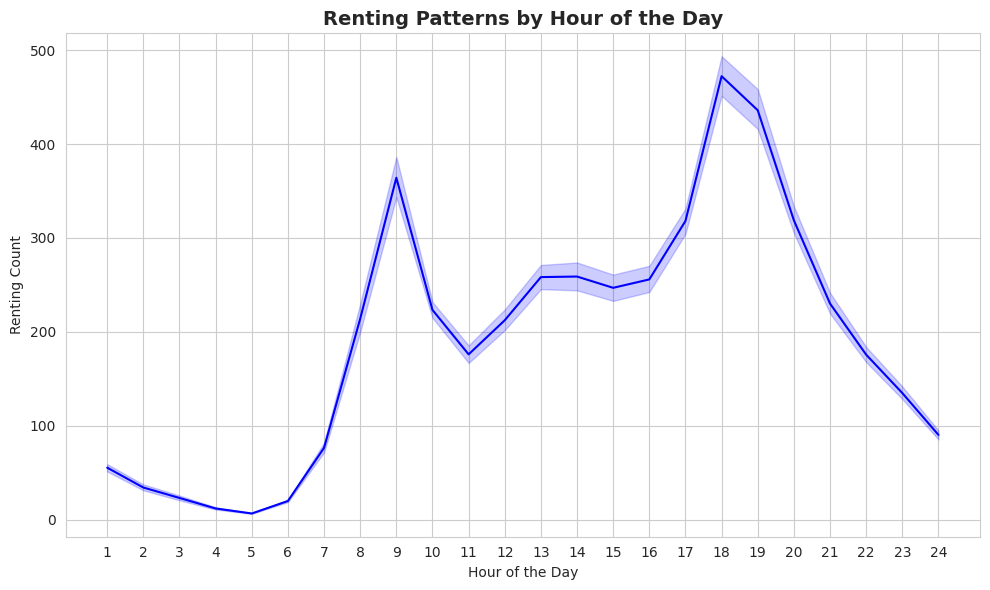

In [ ]:
# visualize peak time
plt.figure(figsize=(10, 6))
sns.lineplot(x=train_data['hour'], y=train_data['count'], color='blue')
plt.title('Renting Patterns by Hour of the Day', fontsize=14, weight='bold')
plt.xlabel('Hour of the Day')
plt.ylabel('Renting Count')
plt.xticks(range(1, 25))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# create pike hour
train_data['is_peak_hour'] = 0
train_data.loc[(train_data['hour'] >= 8) & (train_data['hour'] <= 10), 'is_peak_hour'] = 1
train_data.loc[(train_data['hour'] >= 17) & (train_data['hour'] <= 20), 'is_peak_hour'] = 1

In [ ]:
# classify by increasing(2) and decreasing(1)
train_data['change_pattern_day'] = 0
train_data.loc[(train_data['hour'] >= 1) & (train_data['hour'] < 5),'change_pattern_day'] = 1
train_data.loc[(train_data['hour'] >= 5) & (train_data['hour'] < 9), 'change_pattern_day'] = 2
train_data.loc[(train_data['hour'] >= 9) & (train_data['hour'] < 11),'change_pattern_day'] = 1
train_data.loc[(train_data['hour'] >= 11) & (train_data['hour'] < 13), 'change_pattern_day'] = 2
train_data.loc[(train_data['hour'] >= 13) & (train_data['hour'] < 15), 'change_pattern_day'] = 1
train_data.loc[(train_data['hour'] >= 15) & (train_data['hour'] < 18), 'change_pattern_day'] = 2
train_data.loc[(train_data['hour'] >= 18) & (train_data['hour'] < 24), 'change_pattern_day'] = 1

In [ ]:
# # visualize renting of day
# plt.figure(figsize=(10, 6))
# sns.lineplot(x=train_data['day_of_week'], y=train_data['count'], color='blue')
# plt.title('Renting Patterns by Day', fontsize=14, weight='bold')
# plt.xlabel('Day in a week')
# plt.ylabel('Renting Count')
# plt.xticks(range(1,8))
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# Rolling Statistics feature
train_data['hour_rolling_mean_7'] = train_data['hour'].rolling(window=7).mean()
train_data['hour_rolling_mean_30'] = train_data['hour'].rolling(window=30).mean()
train_data['atemp_rolling_mean_7'] = train_data['atemp'].rolling(window=7).mean()
train_data['atemp_rolling_mean_30'] = train_data['atemp'].rolling(window=30).mean()
# difference
train_data['temp_diff_7'] = train_data['temp'].diff(7)

In [ ]:
X_train = train_data.drop('count', axis=1)
y_train = train_data['count']
# split train data into train and test data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
# Creat random forest model
rf_4 = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=8,
                           min_samples_leaf=3, random_state=0 )
k = 5
scores = cross_val_score(rf_4, X_train_new, y_train_new, cv=k, scoring=rmsle_scorer)


In [ ]:
# complite model
rf_4.fit(X_train_new, y_train_new)
y_train_pred_rf_4 = rf_4.predict(X_train_new)
y_test_pred_rf_4= rf_4.predict(X_test_new)

In [ ]:
# evaluate rf
train_rmsle_value_rf_4 = rmsle(y_train_new, y_train_pred_rf_4)
test_rmsle_value_rf_4 = rmsle(y_test_new, y_test_pred_rf_4)
print(f"The fourth Random Forest Test RMSLE: {test_rmsle_value_rf_4}")
print(f"The fourth Random Forest Train RMSLE: {train_rmsle_value_rf_4}")

The fourth Random Forest Test RMSLE: 0.414407733965769
The fourth Random Forest Train RMSLE: 0.3231959244414048


In [ ]:
# # 计算分割索引
# split_index = int(0.8 * len(X_train))  # 前80%作为训练集

# # 划分数据
# X_train_new, X_test_new = X_train[:split_index], X_train[split_index:]
# y_train_new, y_test_new = y_train[:split_index], y_train[split_index:]


In [ ]:
# # Creat random forest model
# from sklearn.model_selection import TimeSeriesSplit
# rf_5 = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=8,
#                            min_samples_leaf=3, random_state=0 )
# scores_train = []
# scores_test = []
# tscv = TimeSeriesSplit(n_splits=5)
# for train_index, val_index in tscv.split(X_train_new):
#     X_train_fold, X_val_fold = X_train_new.iloc[train_index], X_train_new.iloc[val_index]
#     y_train_fold, y_val_fold = y_train_new.iloc[train_index], y_train_new.iloc[val_index]

#     # 在当前折的训练集上训练模型
#     rf_5.fit(X_train_fold, y_train_fold)

#     # 在当前折的验证集上预测并计算 RMSLE
#     y_train_pred = rf_5.predict(X_train_fold)
#     train = rmsle(y_train_fold, y_train_pred)
#     scores_train.append(train)

#     # 在测试集上预测并计算 RMSLE
#     y_test_pred = rf_5.predict(X_val_fold)
#     test = rmsle(y_val_fold, y_test_pred)  # 假设 rmsle 是您定义的 RMSLE 函数
#     scores_test.append(test)
# print(f"The fifth Random Forest Train RMSLE: {np.mean(scores_train)}")
# print(f"The fifth Random Forest Test RMSLE: {np.mean(scores_test)}")

The fifth Random Forest Train RMSLE: 0.28137042884725827
The fifth Random Forest Test RMSLE: 0.4913543188353672


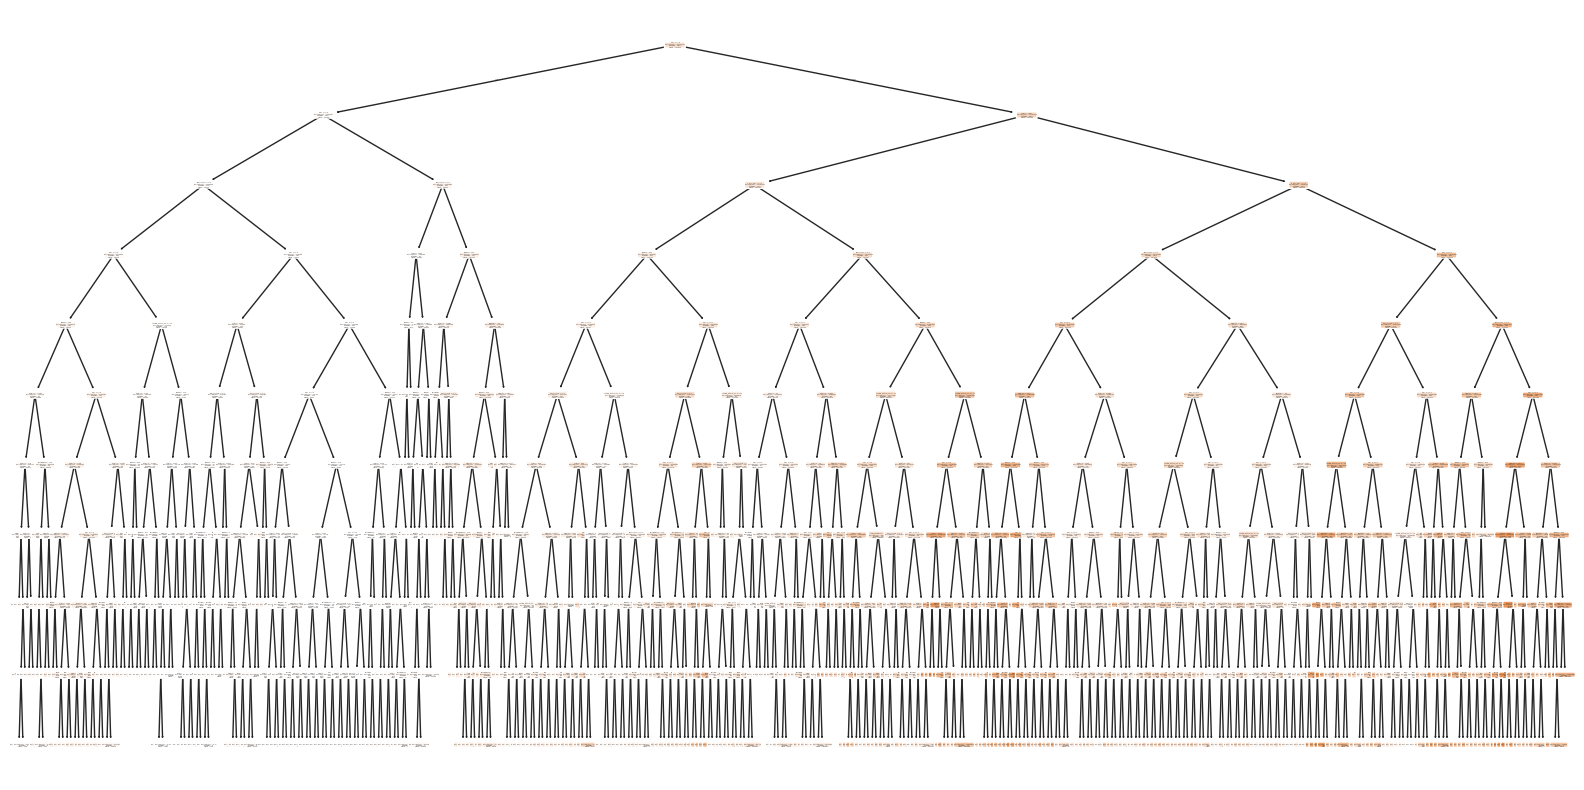

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# random select one of the tree
tree = rf_4.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()


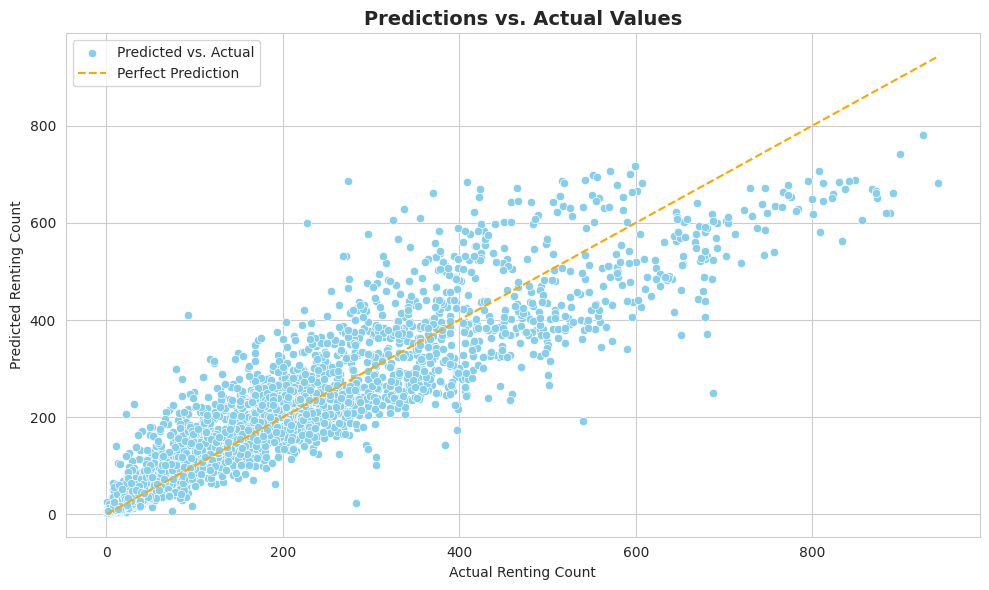

In [ ]:
# visualization the result
# 绘制预测值和实际值的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_new, y=y_test_pred_rf_4, color='skyblue', label='Predicted vs. Actual')
sns.lineplot(x=y_test_new, y=y_test_new, color='orange', linestyle='--', label='Perfect Prediction')
plt.title('Predictions vs. Actual Values', fontsize=14, weight='bold')
plt.xlabel('Actual Renting Count')
plt.ylabel('Predicted Renting Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

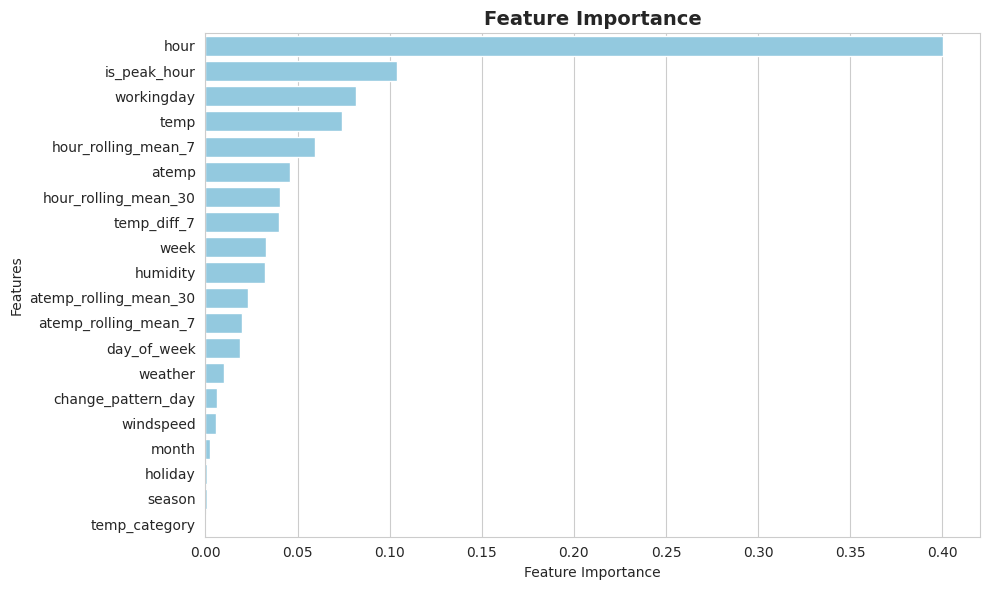

In [ ]:
# the importance of feature
feature_importances = rf_4.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 绘图
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], color='skyblue')
plt.title('Feature Importance', fontsize=14, weight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# Create hour of the day
test_data['hour'] = pd.to_datetime(test_data['datetime']).dt.hour+1
# Create day of the work
test_data['day_of_week'] = pd.to_datetime(test_data['datetime']).dt.dayofweek+1
# Create month
test_data['month'] = pd.to_datetime(test_data['datetime']).dt.month
# Create week
test_data['week'] = pd.to_datetime(test_data['datetime']).dt.strftime("%U").astype(int)+1
test_data['temp_category'] = pd.cut(test_data['temp'],
bins=[-float('inf'), 10, 30, float('inf')],
labels=['1', '2', '3']).astype(int)
# create pike hour
test_data['is_peak_hour'] = 0
test_data.loc[(test_data['hour'] >= 8) & (test_data['hour'] <= 10), 'is_peak_hour'] = 1
test_data.loc[(test_data['hour'] >= 17) & (test_data['hour'] <= 20), 'is_peak_hour'] = 1
# classify by increasing(2) and decreasing(1)
test_data['change_pattern_day'] = 0
test_data.loc[(test_data['hour'] >= 1) & (test_data['hour'] < 5),'change_pattern_day'] = 1
test_data.loc[(test_data['hour'] >= 5) & (test_data['hour'] < 9), 'change_pattern_day'] = 2
test_data.loc[(test_data['hour'] >= 9) & (test_data['hour'] < 11),'change_pattern_day'] = 1
test_data.loc[(test_data['hour'] >= 11) & (test_data['hour'] < 13), 'change_pattern_day'] = 2
test_data.loc[(test_data['hour'] >= 13) & (test_data['hour'] < 15), 'change_pattern_day'] = 1
test_data.loc[(test_data['hour'] >= 15) & (test_data['hour'] < 18), 'change_pattern_day'] = 2
test_data.loc[(test_data['hour'] >= 18) & (test_data['hour'] < 24), 'change_pattern_day'] = 1
# Drop unnecessary columns
test_data.drop(['datetime'], axis=1, inplace=True)

In [ ]:
y_pred = rf_4.predict(test_data)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/project 570/sampleSubmission.csv')
submission['count'] = y_pred.astype(int)

In [ ]:
submission

,datetime,count
0,2011-01-20 00:00:00,15
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,4
3,2011-01-20 03:00:00,2
4,2011-01-20 04:00:00,2
...,...,...
6488,2012-12-31 19:00:00,330
6489,2012-12-31 20:00:00,175
6490,2012-12-31 21:00:00,150
6491,2012-12-31 22:00:00,110


In [ ]:
# save submission
submission.to_csv('/content/drive/MyDrive/project 570/submission.csv', index=False)